In [74]:
import numpy as np 
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import log_loss
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier

In [379]:
train= pd.read_csv("C://Users/Saba Naseem/Desktop/Data Driven/Machine Learning with a Heart/train_values.csv")
labels=pd.read_csv("C://Users/Saba Naseem/Desktop/Data Driven/Machine Learning with a Heart/train_labels.csv")
test=pd.read_csv("C://Users/Saba Naseem/Desktop/Data Driven/Machine Learning with a Heart/test_values.csv")
train.shape, labels.shape

((180, 14), (180, 2))

In [380]:

labels.drop('patient_id', axis=1, inplace=True)
df= pd.concat([train, labels], axis=1)

df.drop(['patient_id'], axis=1, inplace=True)

In [381]:
df.head()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


In [322]:
df.loc[df['serum_cholesterol_mg_per_dl']<=150,'serum_cholesterol_mg_per_dl']=1
df.loc[((df['serum_cholesterol_mg_per_dl']>150) & (df['serum_cholesterol_mg_per_dl']<=170)),'serum_cholesterol_mg_per_dl']=2
df.loc[((df['serum_cholesterol_mg_per_dl']>170) & (df['serum_cholesterol_mg_per_dl']<=190)),'serum_cholesterol_mg_per_dl']=3
df.loc[((df['serum_cholesterol_mg_per_dl']>190) & (df['serum_cholesterol_mg_per_dl']<=210)),'serum_cholesterol_mg_per_dl']=4
df.loc[((df['serum_cholesterol_mg_per_dl']>210) & (df['serum_cholesterol_mg_per_dl']<=230)),'serum_cholesterol_mg_per_dl']=5
df.loc[((df['serum_cholesterol_mg_per_dl']>230) & (df['serum_cholesterol_mg_per_dl']<=250)),'serum_cholesterol_mg_per_dl']=6
df.loc[((df['serum_cholesterol_mg_per_dl']>250) & (df['serum_cholesterol_mg_per_dl']<=270)),'serum_cholesterol_mg_per_dl']=7

df.loc[((df['serum_cholesterol_mg_per_dl']>270) & (df['serum_cholesterol_mg_per_dl']<=290)),'serum_cholesterol_mg_per_dl']=8
df.loc[((df['serum_cholesterol_mg_per_dl']>290) & (df['serum_cholesterol_mg_per_dl']<=310)),'serum_cholesterol_mg_per_dl']=9
df.loc[((df['serum_cholesterol_mg_per_dl']>310) & (df['serum_cholesterol_mg_per_dl']<=330)),'serum_cholesterol_mg_per_dl']=10
df.loc[((df['serum_cholesterol_mg_per_dl']>330) & (df['serum_cholesterol_mg_per_dl']<=350)),'serum_cholesterol_mg_per_dl']=11
df.loc[(df['serum_cholesterol_mg_per_dl']>350),'serum_cholesterol_mg_per_dl']=12

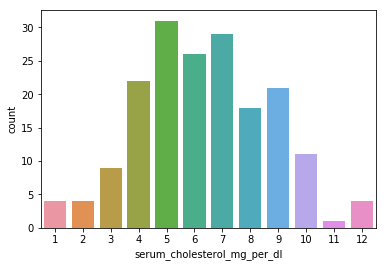

In [273]:
sns.countplot(df['serum_cholesterol_mg_per_dl'])

In [323]:
df.loc[df['age']<=35,'age']=1
df.loc[((df['age']>35) & (df['age']<=40)),'age']=2
df.loc[((df['age']>40) & (df['age']<=45)),'age']=3
df.loc[((df['age']>45) & (df['age']<=50)),'age']=4

df.loc[((df['age']>50) & (df['age']<=55)),'age']=5
df.loc[((df['age']>55) & (df['age']<=60)),'age']=6
df.loc[((df['age']>60) & (df['age']<=65)),'age']=7
df.loc[(df['age']>65),'age']=8

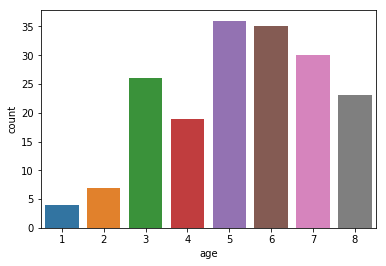

In [284]:
sns.countplot(df['age'])

In [324]:
df.loc[df['max_heart_rate_achieved']<=130,'max_heart_rate_achieved']=1
df.loc[((df['max_heart_rate_achieved']>130) & (df['max_heart_rate_achieved']<=140)),'max_heart_rate_achieved']=2
df.loc[((df['max_heart_rate_achieved']>140) & (df['max_heart_rate_achieved']<=150)),'max_heart_rate_achieved']=3

df.loc[((df['max_heart_rate_achieved']>150) & (df['max_heart_rate_achieved']<=160)),'max_heart_rate_achieved']=4
df.loc[((df['max_heart_rate_achieved']>160) & (df['max_heart_rate_achieved']<=170)),'max_heart_rate_achieved']=5

df.loc[((df['max_heart_rate_achieved']>170) & (df['max_heart_rate_achieved']<=180)),'max_heart_rate_achieved']=6

df.loc[(df['max_heart_rate_achieved']>180),'max_heart_rate_achieved']=7

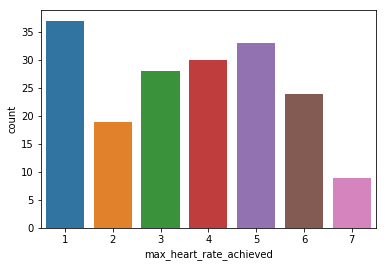

In [295]:
sns.countplot(df['max_heart_rate_achieved'])

In [325]:
df.loc[((df['resting_blood_pressure']==120) | (df['resting_blood_pressure']==130) | (df['resting_blood_pressure']==140)),'resting_blood_pressure']=1

In [348]:
df['resting_blood_pressure'].min(),df['resting_blood_pressure'].max()

(94, 180)

In [353]:
df.loc[df['resting_blood_pressure']<=100,'resting_blood_pressure']=1
df.loc[((df['resting_blood_pressure']>100) & (df['resting_blood_pressure']<=110)),'resting_blood_pressure']=2
df.loc[((df['resting_blood_pressure']>110) & (df['resting_blood_pressure']<=120)),'resting_blood_pressure']=3

df.loc[((df['resting_blood_pressure']>120) & (df['resting_blood_pressure']<=130)),'resting_blood_pressure']=4
df.loc[((df['resting_blood_pressure']>130) & (df['resting_blood_pressure']<=140)),'resting_blood_pressure']=5

df.loc[((df['resting_blood_pressure']>140) & (df['resting_blood_pressure']<=150)),'resting_blood_pressure']=6
df.loc[((df['resting_blood_pressure']>150) & (df['resting_blood_pressure']<=160)),'resting_blood_pressure']=7

df.loc[((df['resting_blood_pressure']>160) & (df['resting_blood_pressure']<=170)),'resting_blood_pressure']=8
df.loc[(df['resting_blood_pressure']>170),'resting_blood_pressure']=9

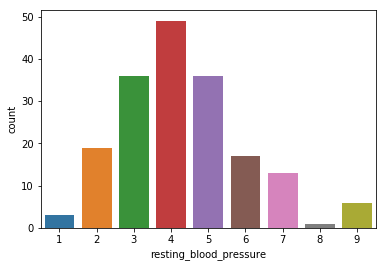

In [354]:
sns.countplot(df['resting_blood_pressure'])

In [385]:
df['thal']=df['thal'].map({'normal':1,'reversible_defect':2, 'fixed_defect':3 })

In [390]:
df.head()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,1,1,128,2,0,0,2,308,0.0,1,45,170,0,0
1,2,1,110,3,0,0,0,214,1.6,0,54,158,0,0
2,1,1,125,4,3,0,2,304,0.0,1,77,162,1,1
3,1,2,152,4,0,0,0,223,0.0,1,40,181,0,1
4,3,2,178,1,0,0,2,270,4.2,1,59,145,0,0


In [382]:
names=df.columns
names

Index(['slope_of_peak_exercise_st_segment', 'thal', 'resting_blood_pressure',
       'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina',
       'heart_disease_present'],
      dtype='object')

In [386]:
x=np.asarray(df[names[:-1]])
y=np.asarray(df[names[-1]])

In [387]:
scaler= StandardScaler()
x=scaler.fit_transform(x)

In [373]:
x.shape, y.shape

((180, 13), (180,))

In [388]:
rf= RandomForestClassifier(n_estimators=50)
rf.fit(x,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

([<matplotlib.axis.XTick at 0x21ef496a7f0>,
 <a list of 13 Text xticklabel objects>)

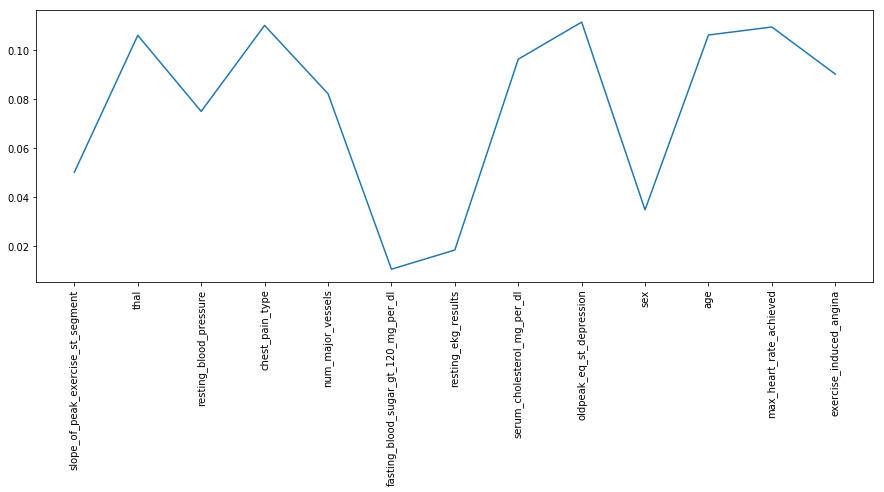

In [33]:
plt.figure(figsize=[15,5])
plt.plot(rf.feature_importances_)
plt.xticks(np.arange(df.shape[1]-1), names[:-1], rotation=90)

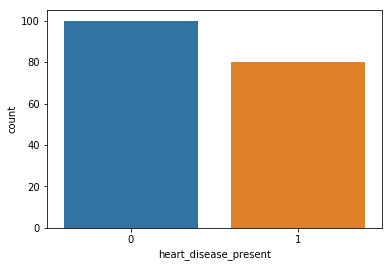

In [46]:
sns.countplot(df[names[-1]])

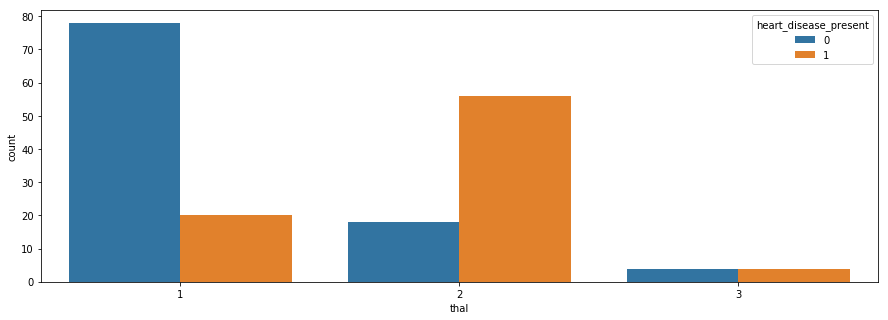

In [37]:
plt.figure(figsize=[15,5])
sns.countplot(df['thal'], hue=df[names[-1]])

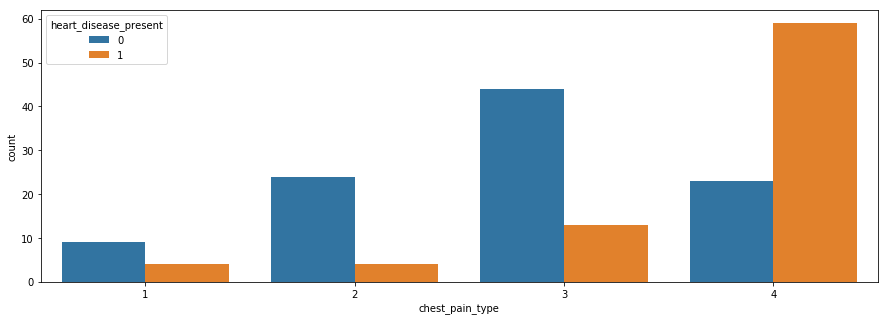

In [39]:
plt.figure(figsize=[15,5])
sns.countplot(df['chest_pain_type'], hue=df[names[-1]])

In [335]:
kf=KFold(n_splits=5, random_state=None, shuffle=False)

rf= RandomForestClassifier(n_estimators=30, criterion='entropy',max_depth=5,min_samples_split=5)
gb=GradientBoostingClassifier(n_estimators=10,max_depth= 5, min_samples_leaf= 2)
ab=AdaBoostClassifier(n_estimators=500)
lr=LogisticRegression(C=0.07)
et=ExtraTreesClassifier(n_estimators=50,max_depth= 8, min_samples_leaf= 2,verbose= 0)

rf_train, rf_test=[],[]
gb_train, gb_test= [],[]
ab_train, ab_test= [],[]
lr_train, lr_test=[],[]
et_train, et_test=[],[]
#sp1,sp2=[],[]

for train_index, test_index in kf.split(x):
    
    xtrain, xtest= x[train_index], x[test_index]
    ytrain, ytest= y[train_index], y[test_index]
    
    rf.fit(xtrain, ytrain)
    predict1=rf.predict_proba(xtrain)
    predict2= rf.predict_proba(xtest)
    a=rf.predict(xtest)
    a_=rf.predict(xtrain)
    
    rf_train.append(log_loss(ytrain, predict1))
    rf_test.append(log_loss(ytest, predict2))
    
    gb.fit(xtrain, ytrain)
    predict3=gb.predict_proba(xtrain)
    predict4= gb.predict_proba(xtest)
    b=gb.predict(xtest)
    b_=gb.predict(xtrain)
    
    gb_train.append(log_loss(ytrain, predict3))
    gb_test.append(log_loss(ytest, predict4))
    
    ab.fit(xtrain, ytrain)
    predict5=ab.predict_proba(xtrain)
    predict6= ab.predict_proba(xtest)
    c= ab.predict(xtest)
    c_= ab.predict(xtrain)
    
    ab_train.append(log_loss(ytrain, predict5))
    ab_test.append(log_loss(ytest, predict6))
    
    lr.fit(xtrain, ytrain)
    predict7=lr.predict_proba(xtrain)
    predict8= lr.predict_proba(xtest)
    d=lr.predict(xtest)
    d_=lr.predict(xtrain)
    
    lr_train.append(log_loss(ytrain, predict7))
    lr_test.append(log_loss(ytest, predict8))
    
    et.fit(xtrain, ytrain)
    predict9=et.predict_proba(xtrain)
    predict10= et.predict_proba(xtest)
    e=et.predict(xtest)
    e_=et.predict(xtrain)
    
    et_train.append(log_loss(ytrain, predict9))
    et_test.append(log_loss(ytest, predict10))
    
    #stack1= pd.concat([pd.DataFrame(a),pd.DataFrame(b),pd.DataFrame(c),pd.DataFrame(d),pd.DataFrame(e)],axis=1)
    #stack2=pd.concat([pd.DataFrame(a_),pd.DataFrame(b_),pd.DataFrame(c_),pd.DataFrame(d_),pd.DataFrame(e_)],axis=1)
    
    #stack1_= np.asarray(stack1)
    #stack2_= np.asarray(stack2)
    
    #et.fit(stack2_, ytrain)
    #pr1=et.predict_proba(stack2_)
    #pr2= et.predict_proba(stack1_)
    
    #sp1.append(log_loss(ytrain, pr1))
    #sp2.append(log_loss(ytest, pr2))

In [337]:
print("RF train: ", np.array(rf_train).mean(),"test: ", np.array(rf_test).mean() )
print("\nGB train: ", np.array(gb_train).mean(),"test: ", np.array(gb_test).mean() )
print("\nAB train: ", np.array(ab_train).mean(),"test: ", np.array(ab_test).mean() )
print("\nLR train: ", np.array(lr_train).mean(),"test: ", np.array(lr_test).mean() )
print("\nET train: ", np.array(et_train).mean(),"test: ", np.array(et_test).mean() )
#print("\nST train: ", np.array(sp1).mean(),"test: ", np.array(sp2).mean() )

RF train:  0.25842326104801605 test:  0.4316075500050892

GB train:  0.2846520961326059 test:  0.5103467586452016

AB train:  0.6840028270002045 test:  0.6859839918294859

LR train:  0.39157771907557076 test:  0.4321981860719342

ET train:  0.22317907752921587 test:  0.42743650890803747


In [359]:
et=ExtraTreesClassifier(n_estimators=50,max_depth= 8, min_samples_leaf= 2,verbose= 0)
et.fit(x,y)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=8, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

### Testing

In [128]:
test.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,olalu7,2,reversible_defect,170,1,0,0,2,288,0.2,1,59,159,0
1,z9n6mx,1,normal,138,4,0,0,0,183,1.4,0,35,182,0
2,5k4413,2,reversible_defect,120,4,0,0,2,177,2.5,1,43,120,1
3,mrg7q5,1,normal,102,3,1,0,0,318,0.0,0,60,160,0
4,uki4do,2,normal,138,4,1,0,2,166,3.6,1,61,125,1


In [361]:
idd= test['patient_id']
test['thal']=test['thal'].map({'normal':1,'reversible_defect':2, 'fixed_defect':3 })
test.drop(['patient_id'], axis=1, inplace=True)


In [355]:
test.loc[test['serum_cholesterol_mg_per_dl']<=150,'serum_cholesterol_mg_per_dl']=1
test.loc[((test['serum_cholesterol_mg_per_dl']>150) & (test['serum_cholesterol_mg_per_dl']<=170)),'serum_cholesterol_mg_per_dl']=2
test.loc[((test['serum_cholesterol_mg_per_dl']>170) & (test['serum_cholesterol_mg_per_dl']<=190)),'serum_cholesterol_mg_per_dl']=3
test.loc[((test['serum_cholesterol_mg_per_dl']>190) & (test['serum_cholesterol_mg_per_dl']<=210)),'serum_cholesterol_mg_per_dl']=4
test.loc[((test['serum_cholesterol_mg_per_dl']>210) & (test['serum_cholesterol_mg_per_dl']<=230)),'serum_cholesterol_mg_per_dl']=5
test.loc[((test['serum_cholesterol_mg_per_dl']>230) & (test['serum_cholesterol_mg_per_dl']<=250)),'serum_cholesterol_mg_per_dl']=6
test.loc[((test['serum_cholesterol_mg_per_dl']>250) & (test['serum_cholesterol_mg_per_dl']<=270)),'serum_cholesterol_mg_per_dl']=7

test.loc[((test['serum_cholesterol_mg_per_dl']>270) & (test['serum_cholesterol_mg_per_dl']<=290)),'serum_cholesterol_mg_per_dl']=8
test.loc[((test['serum_cholesterol_mg_per_dl']>290) & (test['serum_cholesterol_mg_per_dl']<=310)),'serum_cholesterol_mg_per_dl']=9
test.loc[((test['serum_cholesterol_mg_per_dl']>310) & (test['serum_cholesterol_mg_per_dl']<=330)),'serum_cholesterol_mg_per_dl']=10
test.loc[((test['serum_cholesterol_mg_per_dl']>330) & (test['serum_cholesterol_mg_per_dl']<=350)),'serum_cholesterol_mg_per_dl']=11
test.loc[(test['serum_cholesterol_mg_per_dl']>350),'serum_cholesterol_mg_per_dl']=12

test.loc[test['age']<=35,'age']=1
test.loc[((test['age']>35) & (test['age']<=40)),'age']=2
test.loc[((test['age']>40) & (test['age']<=45)),'age']=3
test.loc[((test['age']>45) & (test['age']<=50)),'age']=4

test.loc[((test['age']>50) & (test['age']<=55)),'age']=5
test.loc[((test['age']>55) & (test['age']<=60)),'age']=6
test.loc[((test['age']>60) & (test['age']<=65)),'age']=7
test.loc[(test['age']>65),'age']=8

test.loc[test['max_heart_rate_achieved']<=130,'max_heart_rate_achieved']=1
test.loc[((test['max_heart_rate_achieved']>130) & (test['max_heart_rate_achieved']<=140)),'max_heart_rate_achieved']=2
test.loc[((test['max_heart_rate_achieved']>140) & (test['max_heart_rate_achieved']<=150)),'max_heart_rate_achieved']=3

test.loc[((test['max_heart_rate_achieved']>150) & (test['max_heart_rate_achieved']<=160)),'max_heart_rate_achieved']=4
test.loc[((test['max_heart_rate_achieved']>160) & (test['max_heart_rate_achieved']<=170)),'max_heart_rate_achieved']=5

test.loc[((test['max_heart_rate_achieved']>170) & (test['max_heart_rate_achieved']<=180)),'max_heart_rate_achieved']=6

test.loc[(test['max_heart_rate_achieved']>180),'max_heart_rate_achieved']=7

test.loc[test['resting_blood_pressure']<=100,'resting_blood_pressure']=1
test.loc[((test['resting_blood_pressure']>100) & (test['resting_blood_pressure']<=110)),'resting_blood_pressure']=2
test.loc[((test['resting_blood_pressure']>110) & (test['resting_blood_pressure']<=120)),'resting_blood_pressure']=3

test.loc[((test['resting_blood_pressure']>120) & (test['resting_blood_pressure']<=130)),'resting_blood_pressure']=4
test.loc[((test['resting_blood_pressure']>130) & (test['resting_blood_pressure']<=140)),'resting_blood_pressure']=5

test.loc[((test['resting_blood_pressure']>140) & (test['resting_blood_pressure']<=150)),'resting_blood_pressure']=6
test.loc[((test['resting_blood_pressure']>150) & (test['resting_blood_pressure']<=160)),'resting_blood_pressure']=7

test.loc[((test['resting_blood_pressure']>160) & (test['resting_blood_pressure']<=170)),'resting_blood_pressure']=8
test.loc[(test['resting_blood_pressure']>170),'resting_blood_pressure']=9

In [362]:
xx=np.asarray(test)

xx=scaler.fit_transform(xx)

In [363]:
predictions= et.predict_proba(xx)

In [364]:
pred= predictions[:,1]

In [365]:
predictions[:5]

array([[0.60901673, 0.39098327],
       [0.92585714, 0.07414286],
       [0.15833333, 0.84166667],
       [0.93469612, 0.06530388],
       [0.23881191, 0.76118809]])

In [366]:
pred[:5]

array([0.39098327, 0.07414286, 0.84166667, 0.06530388, 0.76118809])

In [367]:
data= pd.DataFrame({'patient_id':idd, 'heart_disease_present':pred})

In [368]:
data.to_csv("submit.csv", index=False)